# **MLP model for HMEQ Dataset**

In [1]:
from src import utilities
from src import evaluation
from src import tensorflow

hmeq_dataset_path = '../../../datasets/preprocessed/hmeq/'

2023-03-09 17:09:13.984720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 17:09:14.498939: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-09 17:09:14.498988: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-09 17:09:14.498993: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Model save_path: ../../../models/MLP/2023-03-09_17-09-14


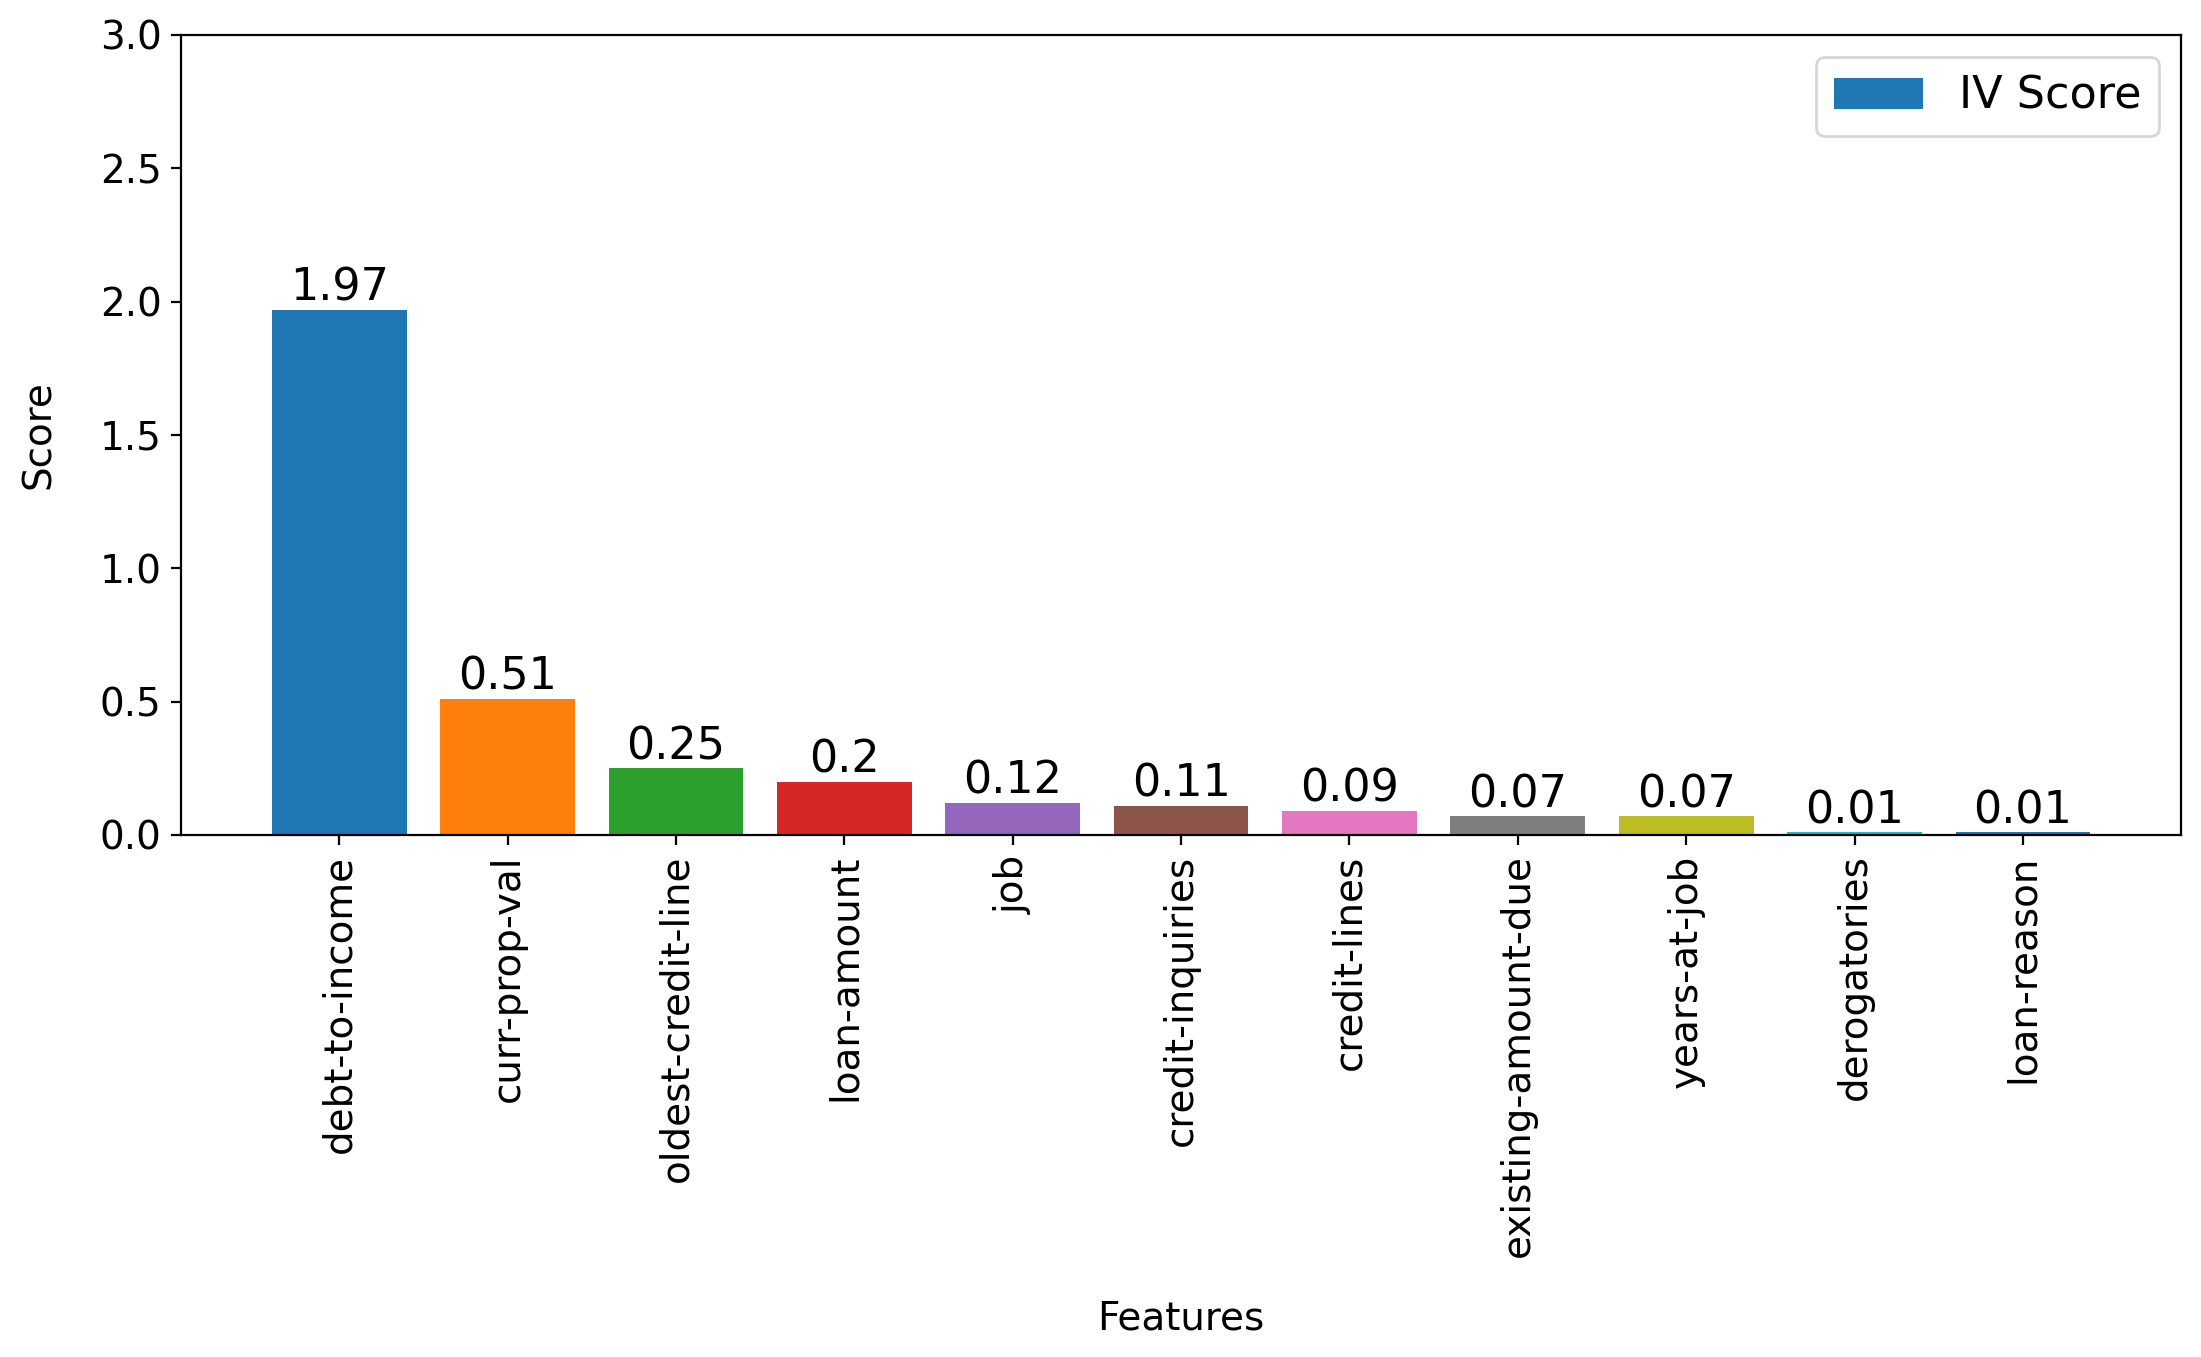

Selected Features: ['loan-amount', 'existing-amount-due', 'curr-prop-val', 'loan-reason', 'job', 'years-at-job', 'derogatories', 'oldest-credit-line', 'credit-inquiries', 'credit-lines', 'debt-to-income']


0it [00:00, ?it/s]

# **FOLD 1**

Model: "MLP-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

2023-03-09 17:09:15.304544: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-09 17:09:15.304568: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-09 17:09:15.304585: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ns31557341): /proc/driver/nvidia/version does not exist
2023-03-09 17:09:15.304818: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
70/75 [===========================>..] - ETA: 0s - loss: 0.0569 - accuracy: 0.7871
Epoch 1: val_loss improved from inf to 0.04967, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


75/75 [==============================] - 3s 26ms/step - loss: 0.0568 - accuracy: 0.7903 - val_loss: 0.0497 - val_accuracy: 0.8423 - lr: 1.0000e-04
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.8494
Epoch 2: val_loss improved from 0.04967 to 0.04524, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0460 - accuracy: 0.8494 - val_loss: 0.0452 - val_accuracy: 0.8385 - lr: 1.0000e-04
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.8389
Epoch 3: val_loss improved from 0.04524 to 0.04490, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


75/75 [==============================] - 2s 22ms/step - loss: 0.0431 - accuracy: 0.8389 - val_loss: 0.0449 - val_accuracy: 0.8410 - lr: 1.0000e-04
Epoch 4/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0422 - accuracy: 0.8495
Epoch 4: val_loss improved from 0.04490 to 0.04422, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0422 - accuracy: 0.8482 - val_loss: 0.0442 - val_accuracy: 0.8406 - lr: 1.0000e-04
Epoch 5/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0417 - accuracy: 0.8539
Epoch 5: val_loss improved from 0.04422 to 0.04334, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


75/75 [==============================] - 2s 22ms/step - loss: 0.0417 - accuracy: 0.8523 - val_loss: 0.0433 - val_accuracy: 0.8398 - lr: 1.0000e-04
Epoch 6/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0413 - accuracy: 0.8486
Epoch 6: val_loss did not improve from 0.04334
75/75 [==============================] - 1s 14ms/step - loss: 0.0411 - accuracy: 0.8494 - val_loss: 0.0434 - val_accuracy: 0.8448 - lr: 1.0000e-04
Epoch 7/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0407 - accuracy: 0.8543
Epoch 7: val_loss improved from 0.04334 to 0.04331, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


75/75 [==============================] - 2s 25ms/step - loss: 0.0405 - accuracy: 0.8561 - val_loss: 0.0433 - val_accuracy: 0.8452 - lr: 1.0000e-04
Epoch 8/100
70/75 [===========================>..] - ETA: 0s - loss: 0.0401 - accuracy: 0.8625
Epoch 8: val_loss improved from 0.04331 to 0.04310, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0401 - accuracy: 0.8620 - val_loss: 0.0431 - val_accuracy: 0.8465 - lr: 1.0000e-04
Epoch 9/100
75/75 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.8674
Epoch 9: val_loss improved from 0.04310 to 0.04293, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0395 - accuracy: 0.8674 - val_loss: 0.0429 - val_accuracy: 0.8440 - lr: 1.0000e-04
Epoch 10/100
72/75 [===========================>..] - ETA: 0s - loss: 0.0401 - accuracy: 0.8659
Epoch 10: val_loss did not improve from 0.04293
75/75 [==============================] - 1s 14ms/step - loss: 0.0398 - accuracy: 0.8670 - val_loss: 0.0454 - val_accuracy: 0.8540 - lr: 1.0000e-04
Epoch 11/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0389 - accuracy: 0.8693
Epoch 11: val_loss did not improve from 0.04293
75/75 [==============================] - 1s 15ms/step - loss: 0.0390 - accuracy: 0.8674 - val_loss: 0.0432 - val_accuracy: 0.8498 - lr: 1.0000e-04
Epoch 12/100
74/75 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.8780
Epoch 12: val_loss did not improve from 0.04293
75/75 [==============================] - 1s 15ms/step - loss: 0.0387 - accuracy: 0.8784 - val_loss: 0.0434 - val_accuracy: 0.84

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-1/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0373 - accuracy: 0.8784 - val_loss: 0.0428 - val_accuracy: 0.8549 - lr: 1.0000e-04
Epoch 16/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0373 - accuracy: 0.8829
Epoch 16: val_loss did not improve from 0.04277
75/75 [==============================] - 1s 15ms/step - loss: 0.0370 - accuracy: 0.8842 - val_loss: 0.0436 - val_accuracy: 0.8419 - lr: 1.0000e-04
Epoch 17/100
70/75 [===========================>..] - ETA: 0s - loss: 0.0374 - accuracy: 0.8790
Epoch 17: val_loss did not improve from 0.04277
75/75 [==============================] - 1s 14ms/step - loss: 0.0367 - accuracy: 0.8830 - val_loss: 0.0434 - val_accuracy: 0.8532 - lr: 1.0000e-04
Epoch 18/100
70/75 [===========================>..] - ETA: 0s - loss: 0.0360 - accuracy: 0.8835
Epoch 18: val_loss did not improve from 0.04277
75/75 [==============================] - 1s 15ms/step - loss: 0.0360 - accuracy: 0.8842 - val_loss: 0.0454 - val_accuracy: 0.85

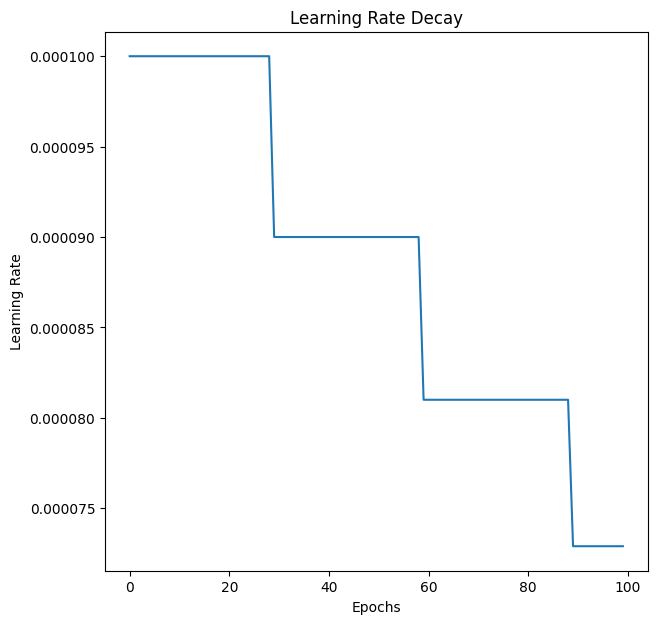

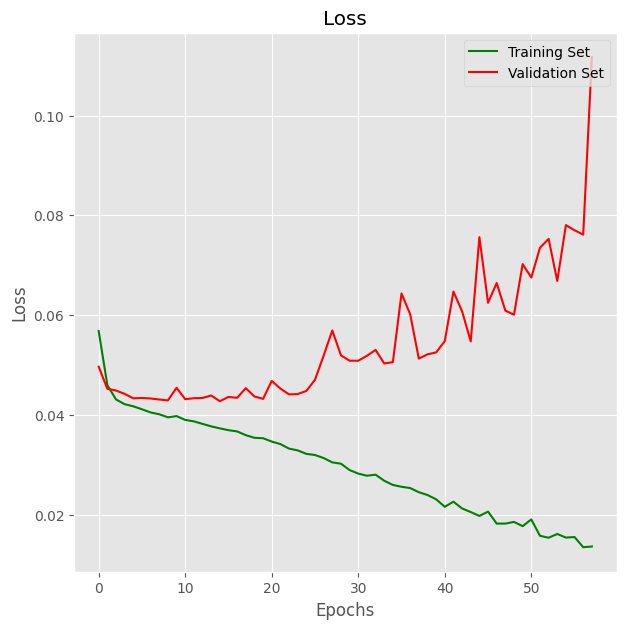

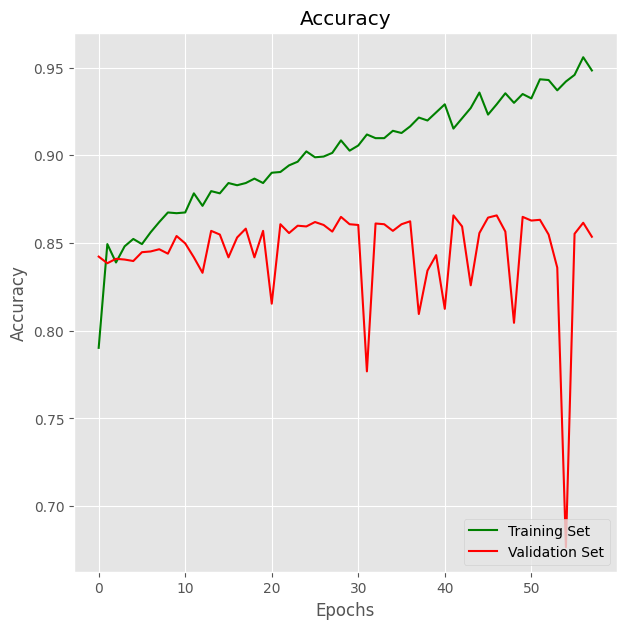

Average loss on train set: 0.02941490554025975
Average accuracy on train set: 0.9006668010662342
Average loss on test set: 0.05447714236275903
Average accuracy on test set: 0.8456375876377369
38/38 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.8565
Test Loss: 0.04187990725040436
Test Accuracy: 0.8565436005592346


2023-03-09 17:10:24.939024: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-09_17-09-14/fold-1: FAILED_PRECONDITION: ../../../models/MLP/2023-03-09_17-09-14/fold-1; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 2ms/step


/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
1it [01:10, 70.99s/it]

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1908
           1       0.68      0.77      0.73       476

    accuracy                           0.88      2384
   macro avg       0.81      0.84      0.83      2384
weighted avg       0.89      0.88      0.89      2384

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1909
           1       0.62      0.69      0.65       475

    accuracy                           0.85      2384
   macro avg       0.77      0.79      0.78      2384
weighted avg       0.86      0.85      0.86      2384


-------- TERMINATED FOLD: 1 --------


# **FOLD 2**

Model: "MLP-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 22ms/step - loss: 0.0569 - accuracy: 0.7932 - val_loss: 0.0493 - val_accuracy: 0.8553 - lr: 1.0000e-04
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.8377
Epoch 2: val_loss improved from 0.04930 to 0.04396, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0463 - accuracy: 0.8377 - val_loss: 0.0440 - val_accuracy: 0.8452 - lr: 1.0000e-04
Epoch 3/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0444 - accuracy: 0.8270
Epoch 3: val_loss improved from 0.04396 to 0.04321, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0439 - accuracy: 0.8297 - val_loss: 0.0432 - val_accuracy: 0.8393 - lr: 1.0000e-04
Epoch 4/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0436 - accuracy: 0.8279
Epoch 4: val_loss improved from 0.04321 to 0.04264, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 21ms/step - loss: 0.0433 - accuracy: 0.8293 - val_loss: 0.0426 - val_accuracy: 0.8427 - lr: 1.0000e-04
Epoch 5/100
70/75 [===========================>..] - ETA: 0s - loss: 0.0429 - accuracy: 0.8286
Epoch 5: val_loss did not improve from 0.04264
75/75 [==============================] - 1s 15ms/step - loss: 0.0429 - accuracy: 0.8276 - val_loss: 0.0431 - val_accuracy: 0.8171 - lr: 1.0000e-04
Epoch 6/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0427 - accuracy: 0.8349
Epoch 6: val_loss improved from 0.04264 to 0.04217, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 27ms/step - loss: 0.0425 - accuracy: 0.8352 - val_loss: 0.0422 - val_accuracy: 0.8456 - lr: 1.0000e-04
Epoch 7/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0424 - accuracy: 0.8385
Epoch 7: val_loss improved from 0.04217 to 0.04197, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0421 - accuracy: 0.8381 - val_loss: 0.0420 - val_accuracy: 0.8427 - lr: 1.0000e-04
Epoch 8/100
75/75 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.8389
Epoch 8: val_loss improved from 0.04197 to 0.04194, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 24ms/step - loss: 0.0417 - accuracy: 0.8389 - val_loss: 0.0419 - val_accuracy: 0.8578 - lr: 1.0000e-04
Epoch 9/100
75/75 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.8448
Epoch 9: val_loss improved from 0.04194 to 0.04184, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0415 - accuracy: 0.8448 - val_loss: 0.0418 - val_accuracy: 0.8574 - lr: 1.0000e-04
Epoch 10/100
70/75 [===========================>..] - ETA: 0s - loss: 0.0405 - accuracy: 0.8491
Epoch 10: val_loss did not improve from 0.04184
75/75 [==============================] - 1s 15ms/step - loss: 0.0412 - accuracy: 0.8435 - val_loss: 0.0419 - val_accuracy: 0.8603 - lr: 1.0000e-04
Epoch 11/100
72/75 [===========================>..] - ETA: 0s - loss: 0.0406 - accuracy: 0.8451
Epoch 11: val_loss improved from 0.04184 to 0.04156, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0408 - accuracy: 0.8448 - val_loss: 0.0416 - val_accuracy: 0.8595 - lr: 1.0000e-04
Epoch 12/100
70/75 [===========================>..] - ETA: 0s - loss: 0.0408 - accuracy: 0.8464
Epoch 12: val_loss did not improve from 0.04156
75/75 [==============================] - 1s 15ms/step - loss: 0.0404 - accuracy: 0.8494 - val_loss: 0.0417 - val_accuracy: 0.8549 - lr: 1.0000e-04
Epoch 13/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0393 - accuracy: 0.8521
Epoch 13: val_loss did not improve from 0.04156
75/75 [==============================] - 1s 15ms/step - loss: 0.0399 - accuracy: 0.8482 - val_loss: 0.0419 - val_accuracy: 0.8339 - lr: 1.0000e-04
Epoch 14/100
75/75 [==============================] - ETA: 0s - loss: 0.0397 - accuracy: 0.8507
Epoch 14: val_loss improved from 0.04156 to 0.04114, saving model to ../../../models/MLP/2023-03-09_17-09-14/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0397 - accuracy: 0.8507 - val_loss: 0.0411 - val_accuracy: 0.8503 - lr: 1.0000e-04
Epoch 15/100
74/75 [============================>.] - ETA: 0s - loss: 0.0396 - accuracy: 0.8522
Epoch 15: val_loss did not improve from 0.04114
75/75 [==============================] - 1s 15ms/step - loss: 0.0395 - accuracy: 0.8532 - val_loss: 0.0416 - val_accuracy: 0.8683 - lr: 1.0000e-04
Epoch 16/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0388 - accuracy: 0.8570
Epoch 16: val_loss did not improve from 0.04114
75/75 [==============================] - 1s 15ms/step - loss: 0.0392 - accuracy: 0.8557 - val_loss: 0.0427 - val_accuracy: 0.8091 - lr: 1.0000e-04
Epoch 17/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0387 - accuracy: 0.8587
Epoch 17: val_loss did not improve from 0.04114
75/75 [==============================] - 1s 15ms/step - loss: 0.0387 - accuracy: 0.8578 - val_loss: 0.0424 - val_accuracy: 0.81

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_17-09-14/fold-2/assets


75/75 [==============================] - 2s 26ms/step - loss: 0.0365 - accuracy: 0.8645 - val_loss: 0.0409 - val_accuracy: 0.8536 - lr: 1.0000e-04
Epoch 24/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0360 - accuracy: 0.8697
Epoch 24: val_loss did not improve from 0.04094
75/75 [==============================] - 1s 15ms/step - loss: 0.0359 - accuracy: 0.8708 - val_loss: 0.0457 - val_accuracy: 0.7781 - lr: 1.0000e-04
Epoch 25/100
73/75 [============================>.] - ETA: 0s - loss: 0.0354 - accuracy: 0.8720
Epoch 25: val_loss did not improve from 0.04094
75/75 [==============================] - 1s 15ms/step - loss: 0.0354 - accuracy: 0.8716 - val_loss: 0.0422 - val_accuracy: 0.8356 - lr: 1.0000e-04
Epoch 26/100
71/75 [===========================>..] - ETA: 0s - loss: 0.0351 - accuracy: 0.8710
Epoch 26: val_loss did not improve from 0.04094
75/75 [==============================] - 1s 15ms/step - loss: 0.0352 - accuracy: 0.8716 - val_loss: 0.0414 - val_accuracy: 0.85

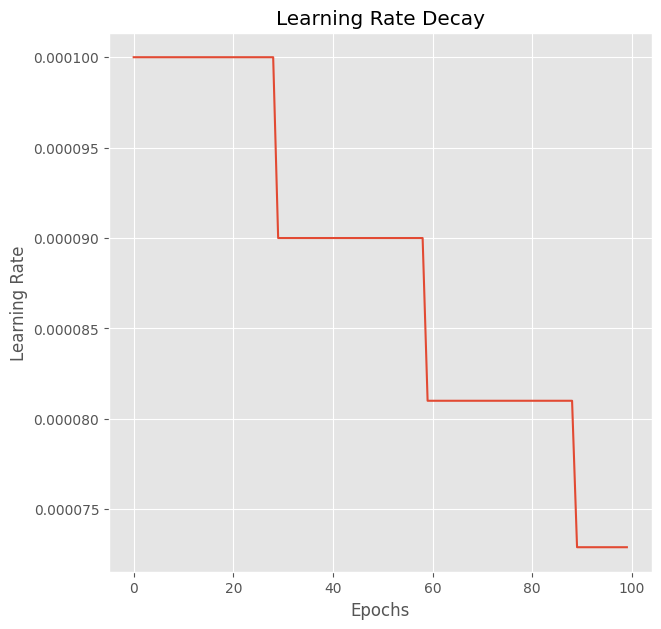

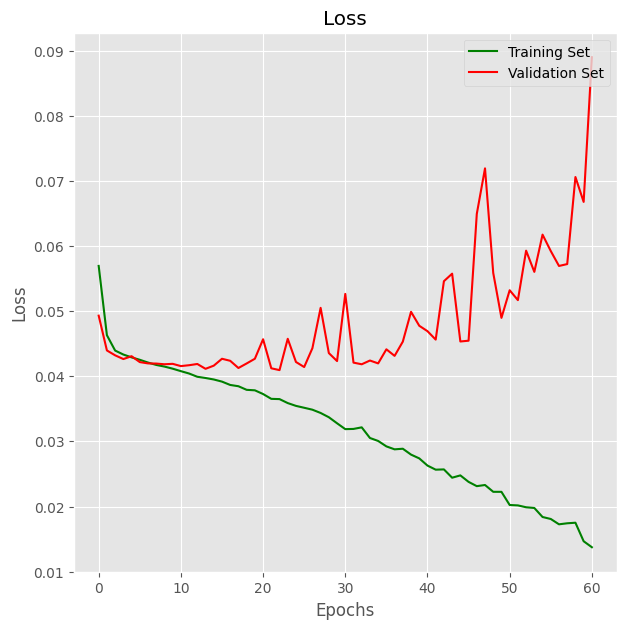

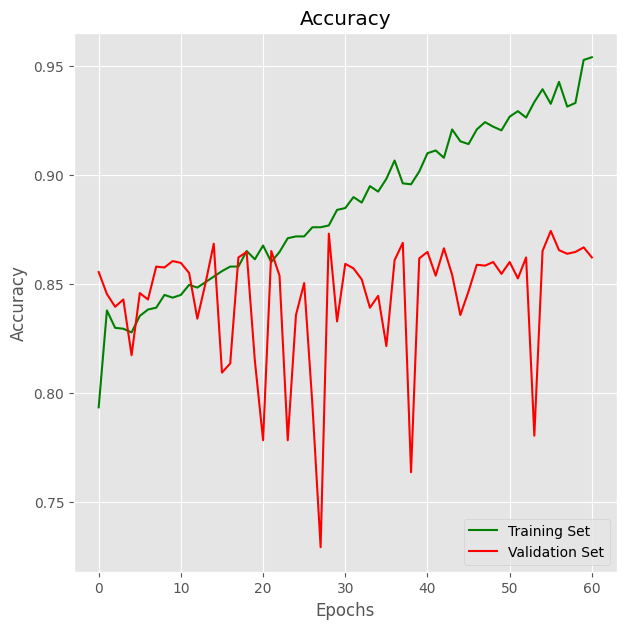

Average loss on train set: 0.031553942068922716
Average accuracy on train set: 0.88510149912756
Average loss on test set: 0.048473790654393493
Average accuracy on test set: 0.8438978419929254
38/38 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.8582
Test Loss: 0.04055719077587128
Test Accuracy: 0.8582214713096619


2023-03-09 17:11:42.120677: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-09_17-09-14/fold-2: FAILED_PRECONDITION: ../../../models/MLP/2023-03-09_17-09-14/fold-2; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 3ms/step


/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
2it [02:28, 74.13s/it]

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1909
           1       0.66      0.77      0.71       475

    accuracy                           0.88      2384
   macro avg       0.80      0.84      0.82      2384
weighted avg       0.89      0.88      0.88      2384

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1908
           1       0.61      0.72      0.66       476

    accuracy                           0.85      2384
   macro avg       0.77      0.80      0.78      2384
weighted avg       0.86      0.85      0.86      2384


-------- TERMINATED FOLD: 2 --------


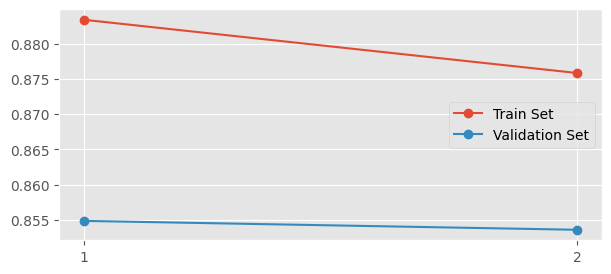

Average Train Set Accuracy: 0.8796140939597316
Average Validation Set Accuracy: 0.854236577181208


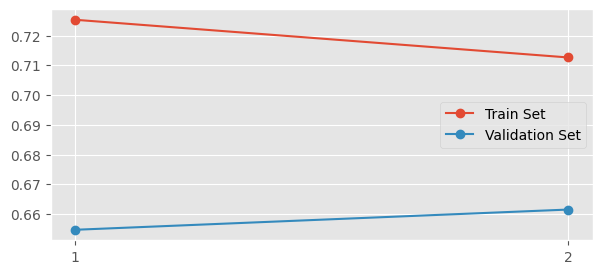

Average Train Set F1 Score: 0.718958900955524
Average Validation Set F1 Score: 0.6580921571018972


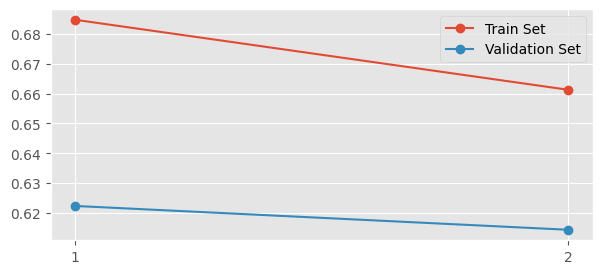

Average Train Set Precision: 0.6729813768992874
Average Validation Set Precision: 0.6184026531275109


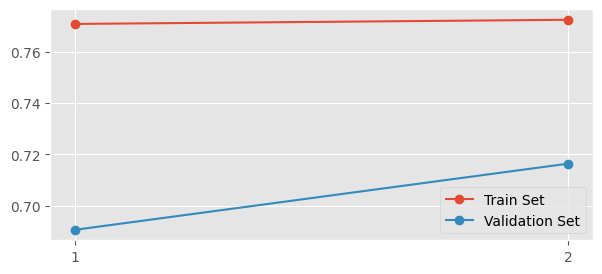

Average Train Set Recall: 0.7718199911543565
Average Validation Set Recall: 0.7034564352056611


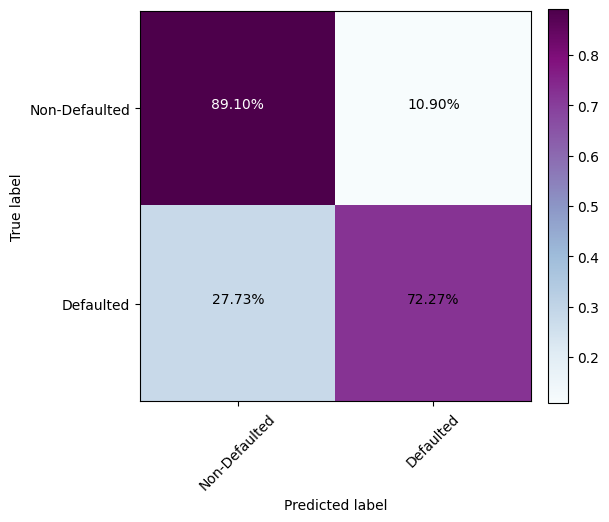

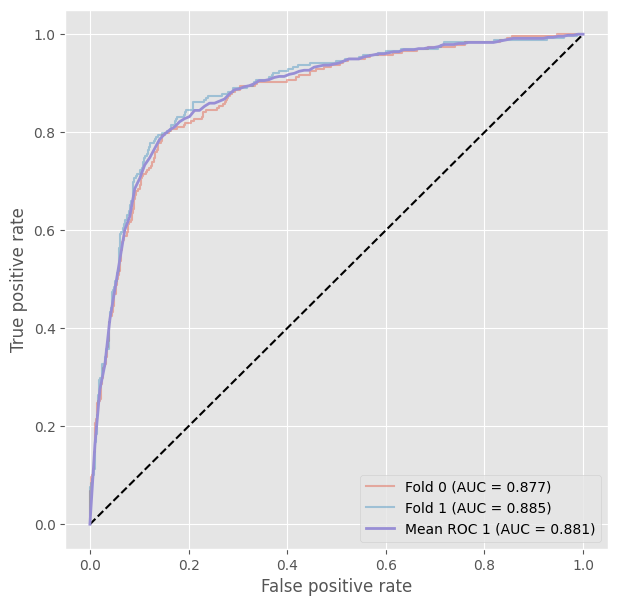

Gini derived from mean AUC 0.7613954672778203


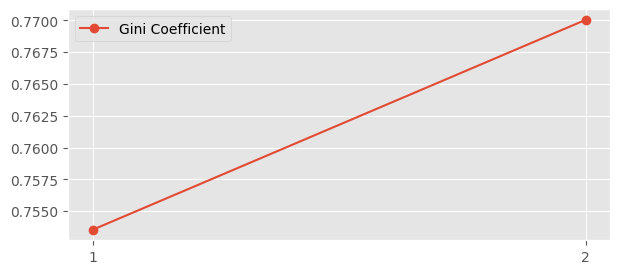

Average Gini Coefficient: 0.7617946549689059


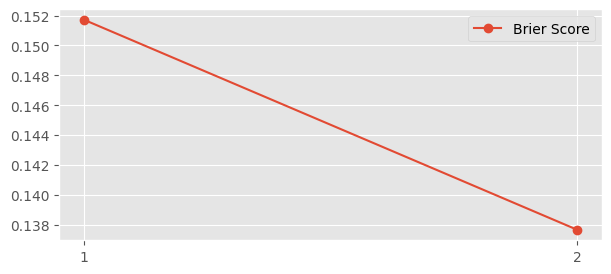

Average Brier Score: 0.14469920645749085


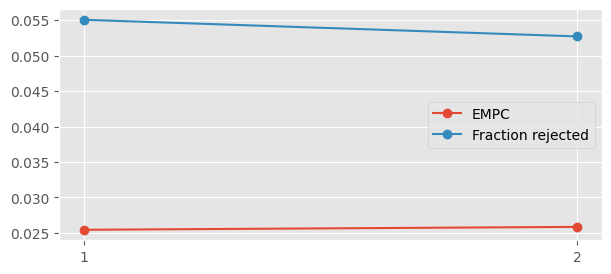

Average EMP: 0.025640440098418985
Average EMP Fractions: 0.053890872032791304


In [2]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

layers = [
    tensorflow.input_layer((11,), dtype='float64'),
    tensorflow.dense_layer(256, activation='relu'),
    tensorflow.dense_layer(512, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(512, activation='relu'),
    tensorflow.dense_layer(256, activation='relu'),
    tensorflow.dense_layer(1, activation='sigmoid')
]

evaluation.k_fold_cross_validate(clf=None, layers=layers, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=2, features_scores=features_scores,
                                 features=11, model_name='MLP', learning_rate=0.0001,
                                 epochs=100, batch_size=32, verbose=True)